In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,auc,precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df = pd.read_csv('/content/credit_scoring.csv')

In [ ]:
df

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan
...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,Male,Divorced,High School,Employed,0.74,1285.0,8,3530000,12.99,48,Auto Loan
996,64,Male,Divorced,Bachelor,Unemployed,0.77,1857.0,2,1377000,18.02,60,Home Loan
997,63,Female,Single,Master,Self-Employed,0.18,2628.0,10,2443000,18.95,12,Personal Loan
998,51,Female,Married,PhD,Self-Employed,0.32,1142.0,3,1301000,1.80,24,Auto Loan


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [ ]:
df.describe()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,42.702000,0.509950,1452.814000,5.580000,2.471401e+06,10.686600,37.128000
std,13.266771,0.291057,827.934146,2.933634,1.387047e+06,5.479058,17.436274
min,20.000000,0.000000,0.000000,1.000000,1.080000e+05,1.010000,12.000000
25%,31.000000,0.250000,763.750000,3.000000,1.298000e+06,6.022500,24.000000
50%,42.000000,0.530000,1428.000000,6.000000,2.437500e+06,10.705000,36.000000
75%,54.000000,0.750000,2142.000000,8.000000,3.653250e+06,15.440000,48.000000
max,65.000000,1.000000,2857.000000,10.000000,4.996000e+06,19.990000,60.000000


In [ ]:
df.shape

(1000, 12)

In [ ]:
df.isnull().sum()

Age                          0
Gender                       0
Marital Status               0
Education Level              0
Employment Status            0
Credit Utilization Ratio     0
Payment History              0
Number of Credit Accounts    0
Loan Amount                  0
Interest Rate                0
Loan Term                    0
Type of Loan                 0
dtype: int64

Within the iteration, the FICO formula is applied to calculate the credit score for each individual. The formula incorporates the weighted values of the features mentioned earlier:

35% weight for “Payment History”,
30% weight for “Credit Utilization Ratio”,
15% weight for “Number of Credit Accounts”,
10% weight for “Education Level”,
and 10% weight for “Employment Status”.

In [ ]:
list[df.columns]

list[Index(['Age', 'Gender', 'Marital Status', 'Education Level',
       'Employment Status', 'Credit Utilization Ratio', 'Payment History',
       'Number of Credit Accounts', 'Loan Amount', 'Interest Rate',
       'Loan Term', 'Type of Loan'],
      dtype='object')]

In [ ]:
employment_status_mapping = {'Unemployed': 0, 'Employed': 1, 'Self-Employed': 2}
df['Employment Status'] = df['Employment Status'].map(employment_status_mapping)

In [ ]:
education_level_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
df['Education Level'] = df['Education Level'].map(education_level_mapping)

In [ ]:
df['Credit_score'] = 0.30*df['Credit Utilization Ratio']+0.35*df['Payment History']+0.15*df['Number of Credit Accounts']+0.10*df['Employment Status']+df['Education Level']

In [ ]:
df.head(10)

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Credit_score
0,60,Male,Married,3,1,0.22,2685.0,2,4675000,2.65,48,Personal Loan,943.216
1,25,Male,Married,1,0,0.20,2371.0,9,3619000,5.19,60,Auto Loan,832.260
2,30,Female,Single,3,1,0.22,2771.0,6,957000,2.76,12,Auto Loan,973.916
3,58,Female,Married,4,0,0.12,1371.0,2,4731000,6.57,60,Auto Loan,484.186
4,32,Male,Married,2,2,0.99,828.0,2,3289000,6.28,36,Personal Loan,292.597
5,42,Male,Divorced,3,0,0.94,2342.0,2,1536000,11.15,24,Personal Loan,823.282
6,44,Female,Divorced,2,0,0.32,2800.0,1,2021000,16.61,36,Auto Loan,982.246
7,24,Male,Divorced,3,1,0.66,1428.0,8,1298000,6.03,24,Home Loan,504.298
8,54,Female,Divorced,4,0,0.40,800.0,3,4374000,10.38,12,Personal Loan,284.570
9,60,Male,Divorced,4,0,0.06,1371.0,10,4026000,11.05,60,Personal Loan,485.368


## Data Analysis

<Axes: xlabel='Credit Utilization Ratio', ylabel='Credit_score'>

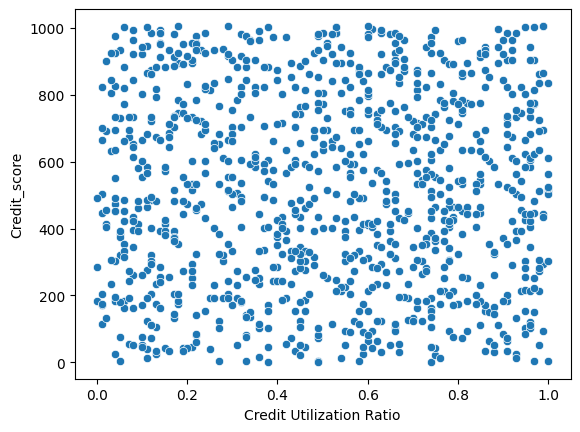

In [63]:
sns.scatterplot(df,x = df['Credit Utilization Ratio'],y = df['Credit_score'])

In [ ]:
sns.scatterplot(df,x = df['Credit Utilization Ratio'],y = df['Credit_score'])

<Axes: xlabel='Payment History', ylabel='Credit_score'>

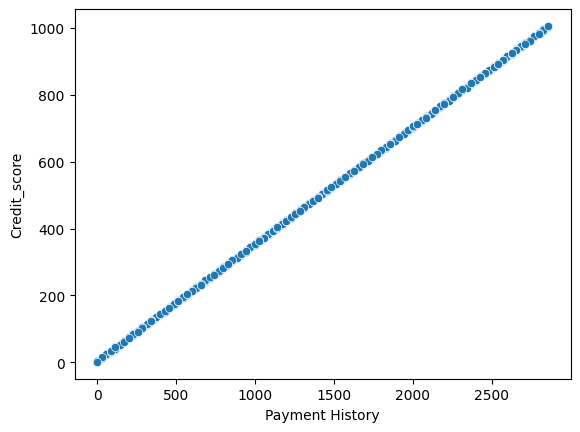

In [64]:
sns.scatterplot(df,x = df['Payment History'],y = df['Credit_score'])

## Model Building


In [ ]:
X_train , X_test,y_train , y_test = train_test_split(df[['Age','Education Level','Employment Status','Credit Utilization Ratio','Payment History','Loan Amount','Loan Term','Number of Credit Accounts']],df['Credit_score'],test_size=0.30,random_state=42)

In [ ]:
X_train.head(5)

,Age,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Loan Amount,Loan Term,Number of Credit Accounts
541,39,1,0,0.24,428.0,903000,60,9
440,45,2,0,1.00,1600.0,2744000,36,6
482,49,2,0,1.00,1485.0,2900000,24,1
422,40,1,0,0.02,371.0,2358000,48,5
778,40,4,2,0.74,285.0,3690000,48,6


In [ ]:
X_test.head(5)

,Age,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Loan Amount,Loan Term,Number of Credit Accounts
521,57,3,0,0.69,657.0,4694000,12,6
737,62,3,0,0.20,2600.0,2411000,24,8
740,49,2,0,0.57,1428.0,2111000,24,1
660,41,2,1,0.56,1771.0,2955000,12,5
411,41,4,1,0.08,1228.0,2730000,36,4


In [ ]:
y_train.head(5)

541    152.222
440    563.200
482    522.200
422    131.606
778    105.072
Name: Credit_score, dtype: float64

In [ ]:
y_test.head(5)

521    234.057
737    914.260
740    502.121
660    622.868
411    434.524
Name: Credit_score, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regr.predict(X_test)

In [52]:
y_pred

array([ 234.057,  914.26 ,  502.121,  622.868,  434.524,  392.776,
       1003.085,  884.651,  820.968,  105.398,   14.129,  152.488,
          3.65 ,  183.296,  542.942,  844.87 ,  722.66 ,  742.335,
        544.328,   45.564,  935.284,  124.566,  372.619,  322.371,
        173.478,  565.613,  512.4  ,   33.423,  514.903,  305.794,
        742.768,  581.334,  232.442,  305.827,   45.313,  611.6  ,
        153.264,  321.286,  933.566,  344.01 ,  921.124,  243.27 ,
        632.759,  103.014,  185.623,  645.173,   62.166,  314.568,
        862.324,   62.911,  445.053,  102.681,    1.472,  213.63 ,
        722.786,   52.793,  771.441,  204.237,  901.588,   44.772,
        502.24 ,  465.333,  192.033,  753.538,  854.943,  684.348,
        201.973,  123.91 ,  732.638,  975.349,  445.655,  183.746,
        375.265,  272.269,  845.687,  481.551,  563.522,  653.474,
        923.037,  731.565,  392.744,  762.385,  192.134,  803.687,
        214.828,  813.78 ,  404.446,   53.135,  944.703,  262.

In [47]:
y_pred.shape

(300,)

In [50]:
y_test.head(5)

521    234.057
737    914.260
740    502.121
660    622.868
411    434.524
Name: Credit_score, dtype: float64

In [ ]:
from sklearn.metrics import accuracy_score

In [43]:
from sklearn.metrics import r2_score

In [45]:
r2_score(y_test, y_pred)

1.0

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
mean_squared_error(y_test, y_pred)

3.076473410955031e-22

In [53]:
from sklearn.ensemble import RandomForestRegressor

# create regressor object


In [55]:
rfregressor = RandomForestRegressor(n_estimators=100,
                                  random_state=42)

# fit the regressor with x and y data
rfregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [56]:
y_pred = rfregressor.predict(X_test)

In [57]:
y_pred

array([ 233.87654,  913.86583,  504.06295,  622.25021,  433.89988,
        392.51044, 1003.33976,  883.52301,  822.26128,  105.14789,
         13.89587,  152.15293,    4.24439,  183.01329,  544.12562,
        842.87222,  723.87851,  743.39477,  544.23327,   43.93112,
        934.22687,  123.97755,  371.29542,  323.81721,  173.43087,
        564.95331,  512.99493,   35.97778,  514.22689,  304.23794,
        743.67212,  583.25575,  232.45784,  304.93647,   43.90577,
        612.94809,  152.72958,  323.11927,  933.07761,  346.04785,
        923.16575,  243.44925,  634.1442 ,  105.04021,  183.54267,
        642.10513,   61.07179,  311.99841,  862.68528,   61.24234,
        445.12297,  103.49846,    4.00764,  213.82899,  723.72169,
         52.83778,  772.55982,  204.45588,  903.14433,   43.79746,
        504.50666,  464.05245,  192.44644,  753.79912,  852.02998,
        682.62171,  204.05075,  124.0214 ,  732.14156,  975.01446,
        444.90038,  182.85095,  374.89797,  272.03532,  844.12

In [58]:
r2_score(y_test, y_pred)

0.9999842158432821

In [59]:
df.corr()



<ipython-input-59-1b895df5df94>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Credit_score
Age,1.000000,0.001192,-0.024152,0.001308,-0.003114,-0.050672,0.034114,0.032867,0.021395,-0.003192
Education Level,0.001192,1.000000,0.002144,-0.042615,-0.015060,0.006995,0.021500,0.006579,-0.035981,-0.011217
Employment Status,-0.024152,0.002144,1.000000,-0.010357,0.016727,0.015499,-0.027039,-0.014619,0.015908,0.017039
Credit Utilization Ratio,0.001308,-0.042615,-0.010357,1.000000,0.002114,-0.001842,-0.014918,0.048237,-0.022924,0.002246
Payment History,-0.003114,-0.015060,0.016727,0.002114,1.000000,0.025022,-0.019084,-0.017618,-0.045532,0.999991
Number of Credit Accounts,-0.050672,0.006995,0.015499,-0.001842,0.025022,1.000000,0.032232,-0.001083,0.012794,0.026572
Loan Amount,0.034114,0.021500,-0.027039,-0.014918,-0.019084,0.032232,1.000000,0.045288,0.014283,-0.018964
Interest Rate,0.032867,0.006579,-0.014619,0.048237,-0.017618,-0.001083,0.045288,1.000000,0.028190,-0.017584
Loan Term,0.021395,-0.035981,0.015908,-0.022924,-0.045532,0.012794,0.014283,0.028190,1.000000,-0.045654
Credit_score,-0.003192,-0.011217,0.017039,0.002246,0.999991,0.026572,-0.018964,-0.017584,-0.045654,1.000000


<ipython-input-60-b0e3f2937894>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), annot=True)


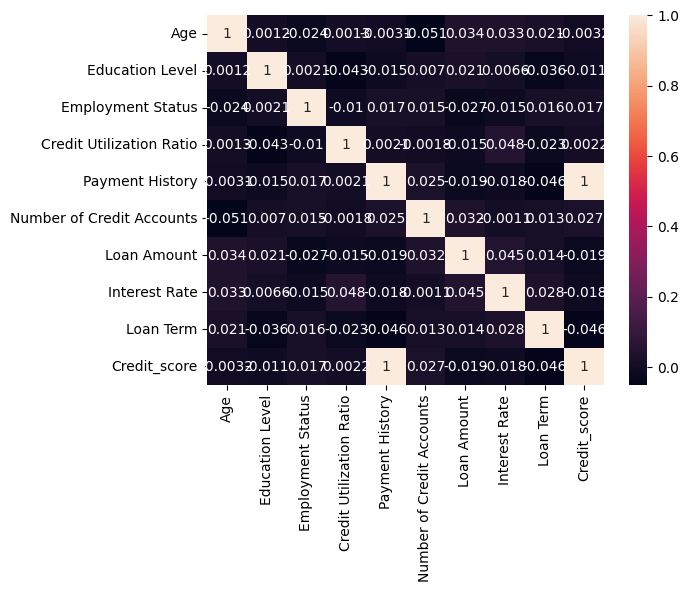

In [60]:

# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), annot=True)